In [1]:
import numpy as np
import mne
import matplotlib as plt

In [2]:

# Load EEG data from a file
raw = mne.io.read_raw_bdf('C:/Users/Adrian/Desktop/Magisterka/Badania/22.05.2024/EL/Testdata.bdf', preload=True)
# raw = mne.io.read_raw_bdf('experyment.bdf', preload=True)
raw.crop(tmin=12, tmax=1462).load_data()
# raw.plot_psd_topomap(ch_type='eeg',  # Specify channel type
#                      average='mean')  # Specify time window for averaging
raw.filter(0., 45., fir_design='firwin')
# raw.describe()
# Check the channel names and remove any unnecessary channels from the raw object
raw.pick_channels(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
# Plot the raw EEG data
raw.plot(block=True)
# Creating channels dictionary
channels_dict = {'A1' : 'Fp1',
                 'A2' : 'Fp2',
                 'A3' : 'F4',
                 'A4' : 'Fz',
                 'A5' : 'F3',
                 'A6' : 'T7',
                 'A7' : 'C3',
                 'A8' : 'Cz',
                 'A9' : 'C4',
                 'A10' : 'T8',
                 'A11' : 'P4',
                 'A12' : 'Pz',
                 'A13' : 'P3',
                 'A14' : 'O1',
                 'A15' : 'Oz',
                 'A16' : 'O2',
                 }

# Renaming channels to match our setup
raw.rename_channels(mapping=channels_dict) 
pos = raw.set_montage('biosemi16')  
# raw.info['dig']  
raw.info['ch_names']
# raw.plot_sensors(show_names=True)
spectrum = raw.compute_psd()
spectrum.plot_topomap(cmap=('jet','True'), show_names=True)




Extracting EDF parameters from C:\Users\Adrian\Desktop\Magisterka\Badania\22.05.2024\EL\Testdata.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1783807  =      0.000 ...   871.000 secs...


ValueError: tmax (1462) must be less than or equal to the max time (870.9995 s)

In [53]:
# Get the total duration in seconds
duration = raw.times[-1]

# Convert duration to a more readable format (hours, minutes, seconds)
bdf_hours = int(duration // 3600)
bdf_minutes = int((duration % 3600) // 60)
bdf_seconds = duration % 60

print(f"Total duration: {bdf_hours*3600 + bdf_minutes*60 + bdf_seconds:.2f}")

Total duration: 1450.00


In [4]:
raw.info

Measurement date,"May 22, 2024 11:32:31 GMT"
Experimenter,Unknown
Participant,
Digitized points,19 points
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


In [5]:
print(raw.info['meas_date'])

2024-05-22 11:32:31+00:00


In [47]:
# Directly use the time() method if meas_date is already a datetime object
time_part = raw.info['meas_date'].time()

# Print the time part
print(time_part)



11:32:31


In [29]:
average_signal = np.mean(raw._data, axis=1)

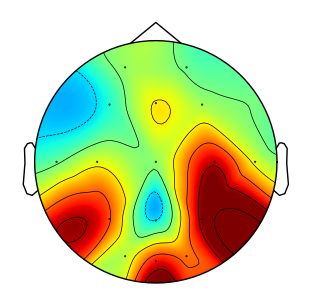

In [30]:
im, _ = mne.viz.plot_topomap(average_signal, raw.info, ch_type='eeg', sensors=True, cmap='jet', res=64, size=3)

In [17]:
print(raw._data.shape)

(16, 4057088)


# to samo tylko z automatycznym odczytem przedzialow czasowych

# Dla przedziałów takich jak w wozku

In [3]:
import re
from datetime import datetime, timedelta

# Path to the log file
log_file_path = 'C:/Users/Adrian/Desktop/logi/2024-04-25_10-17-09.log'

# Read the content of the log file
with open(log_file_path, 'r') as file:
    log_file_content = file.read()

# Compile a regular expression to find the relevant lines
pattern = re.compile(r'(\d{4}-\d{2}-\d{2} (\d{2}:\d{2}:\d{2})) - CRITICAL - Pressed Key\.(f1|f6|f7)')

# Find all matches in the log file content
matches = pattern.findall(log_file_content)

# Initialize dictionaries to hold start and stop times
start_times = {}
flag_intervals = []
base_time = None

# Function to convert time to seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Process the matches
for match in matches:
    full_timestamp, time_only, flag = match
    if flag == 'f1' and base_time is None:
        base_time = time_to_seconds(time_only)
        start_times[flag] = 0
        continue
    
    current_time_in_seconds = time_to_seconds(time_only)
    relative_time = current_time_in_seconds - base_time
    
    if flag not in start_times:
        start_times[flag] = relative_time
    else:
        stop_time = relative_time
        flag_intervals.append((start_times[flag], stop_time, flag))
        del start_times[flag]

# Output the list of tuples
for interval in flag_intervals:
    print(interval)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Adrian/Desktop/logi/2024-04-25_10-17-09.log'

# Test dla przedziałów z pierwszego testu TK,MM,EL

In [27]:
import re
from datetime import datetime

def extract_flag_intervals(log_file):
    with open(log_file, 'r') as file:
        lines = file.readlines()

    flag_intervals = []
    current_flag = None
    start_time = None
    f1_base_time = None
    last_event_time = None

    flag_mapping = {
        "Key.f1": "F1",
        "Key.f3": "F3",
        "Key.f4": "F4",
        "Key.f6": "F6",
        "Key.f7": "F7",
        "Key.f8": "F8"
    }

    time_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})')
    flag_pattern = re.compile(r'CRITICAL - Pressed (\w+\.\w+)')

    def time_to_seconds(time_str):
        time_format = "%Y-%m-%d %H:%M:%S"
        dt = datetime.strptime(time_str, time_format)
        if f1_base_time is None:
            return 0
        delta = dt - f1_base_time
        return delta.total_seconds()

    for line in lines:
        time_match = time_pattern.search(line)
        flag_match = flag_pattern.search(line)

        if time_match and flag_match:
            timestamp = time_match.group(1)
            flag_key = flag_match.group(1)

            if flag_key in flag_mapping:
                dt_timestamp = datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S")

                if flag_mapping[flag_key] == "F1" and f1_base_time is None:
                    f1_base_time = dt_timestamp

                if current_flag is None:
                    current_flag = flag_mapping[flag_key]
                    start_time = timestamp
                else:
                    end_flag = flag_mapping[flag_key]
                    if not ((current_flag == "F3" and end_flag == "F4") or 
                            (current_flag == "F7" and end_flag == "F8")):
                        flag_intervals.append((time_to_seconds(start_time), time_to_seconds(timestamp), current_flag, end_flag))
                    current_flag = flag_mapping[flag_key]
                    start_time = timestamp

                last_event_time = dt_timestamp

    total_duration_seconds = None
    if f1_base_time and last_event_time:
        total_duration_seconds = int((last_event_time - f1_base_time).total_seconds())

    return flag_intervals, f1_base_time, total_duration_seconds

# Main function to execute the script
if __name__ == "__main__":
    log_file = 'C:/Users/Adrian/Desktop/Magisterka/Badania/22.05.2024/TK/2024-05-22_10-16-19.log'
    flag_intervals, f1_base_time, total_duration_seconds = extract_flag_intervals(log_file)
    
    for interval in flag_intervals:
        print(interval)
    
    if f1_base_time:
        f1_starting_time = f1_base_time.strftime('%H:%M:%S')
        print(f"F1 flag starting time: {f1_starting_time}")
    
    if total_duration_seconds is not None:
        print(f"Total duration from F1 start to last event: {total_duration_seconds} seconds")


(0.0, 224.0, 'F1', 'F3')
(256.0, 456.0, 'F4', 'F6')
(456.0, 608.0, 'F6', 'F6')
(608.0, 889.0, 'F6', 'F6')
(889.0, 1158.0, 'F6', 'F7')
(1178.0, 1577.0, 'F8', 'F6')
(1577.0, 1962.0, 'F6', 'F1')
F1 flag starting time: 10:34:42
Total duration from F1 start to last event: 1962 seconds


In [28]:
import numpy as np
import mne
import matplotlib as plt

# Load EEG data from a file (.bdf)
bdf_file_path = 'C:/Users/Adrian/Desktop/Magisterka/Badania/22.05.2024/TK/Testdata(poprawione).bdf'
raw = mne.io.read_raw_bdf(bdf_file_path, preload=True)
# raw.load_data()

Extracting EDF parameters from C:\Users\Adrian\Desktop\Magisterka\Badania\22.05.2024\TK\Testdata(poprawione).bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4057087  =      0.000 ...  1981.000 secs...


In [29]:
from datetime import datetime, timedelta

# Function to convert time string to seconds since start of the day
def time_to_seconds(time_str):
    t = datetime.strptime(time_str, '%H:%M:%S')
    return t.hour * 3600 + t.minute * 60 + t.second

# Function to convert seconds since start of the day to time string
def seconds_to_time(seconds):
    return str(timedelta(seconds=seconds))

# Provided log details for log1
log1_start_time = f1_starting_time
log1_duration = total_duration_seconds  # in seconds
log1_start_seconds = time_to_seconds(log1_start_time)
log1_end_seconds = log1_start_seconds + log1_duration

# Provided log details for log2
bdf_start_time = raw.info['meas_date'].time().strftime("%H:%M:%S")
bdf_duration = raw.times[-1]  # in seconds
bdf_start_seconds = time_to_seconds(bdf_start_time)
bdf_end_seconds = bdf_start_seconds + bdf_duration

# Initialize variables to hold the synchronized times
sync_start_seconds = 0
sync_end_seconds = 0
cut_from_start = 0
cut_from_end = 0

# Determine the appropriate case and adjust times accordingly
if bdf_start_seconds <= log1_start_seconds:
    if bdf_end_seconds <= log1_end_seconds:
        # log2 starts before or at the same time and ends before or at the same time
        sync_start_seconds = log1_start_seconds
        sync_end_seconds = log1_end_seconds
        cut_from_start = log1_start_seconds - bdf_start_seconds
        cut_from_end = bdf_end_seconds - log1_end_seconds
    else:
        # log2 starts before or at the same time and ends after log1
        sync_start_seconds = log1_start_seconds
        sync_end_seconds = log1_end_seconds
        cut_from_start = log1_start_seconds - bdf_start_seconds
        cut_from_end = bdf_end_seconds - log1_end_seconds
else:
    if bdf_end_seconds >= log1_end_seconds:
        # log2 starts after or at the same time and ends after or at the same time
        sync_start_seconds = bdf_start_seconds
        sync_end_seconds = bdf_start_seconds + log1_duration
        cut_from_end = bdf_end_seconds - sync_end_seconds
    else:
        # log2 starts after or at the same time and ends before log1
        sync_start_seconds = bdf_start_seconds
        sync_end_seconds = bdf_start_seconds + log1_duration
        cut_from_end = bdf_end_seconds - sync_end_seconds

# Convert synchronized times back to time strings
sync_start_time = seconds_to_time(sync_start_seconds)
sync_end_time = seconds_to_time(sync_end_seconds)

print(f"Synchronized start time: {sync_start_time}")
print(f"Synchronized end time: {sync_end_time}")
print(f"Cut {cut_from_start} seconds from the start of the second log.")
print(f"Cut {cut_from_end} seconds from the end of the second log.")

tmin=cut_from_start
tmax=cut_from_end


Synchronized start time: 10:34:42
Synchronized end time: 11:07:24
Cut 2 seconds from the start of the second log.
Cut 16.99951171875 seconds from the end of the second log.


In [30]:
raw.crop(tmin=cut_from_start, tmax=(bdf_duration - cut_from_end))

Measurement date,"May 22, 2024 10:34:40 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,"16 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


In [31]:
raw.filter(0., 45., fir_design='firwin')
raw.describe()
raw.pick_channels(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
# Channel names dict to match predefined layout
channels_dict = {'A1' : 'Fp1',
                 'A2' : 'Fp2',
                 'A3' : 'F4',
                 'A4' : 'Fz',
                 'A5' : 'F3',
                 'A6' : 'T7',
                 'A7' : 'C3',
                 'A8' : 'Cz',
                 'A9' : 'C4',
                 'A10' : 'T8',
                 'A11' : 'P4',
                 'A12' : 'Pz',
                 'A13' : 'P3',
                 'A14' : 'O1',
                 'A15' : 'Oz',
                 'A16' : 'O2',
                 }

# Renaming channels
raw.rename_channels(mapping=channels_dict) 
raw.set_montage('biosemi16')  
# raw.info['dig']  
raw.info['ch_names']
# raw.plot_sensors(show_names=True)

plt.rcParams.update({'font.size': 10})

for interval in flag_intervals:
    tmin = interval[0]
    tmax = interval[1]
    raw_copy = raw.copy()
    przedzial = raw_copy
    przedzial = przedzial.crop(tmin=tmin, tmax=tmax)
    przedzial_spectrum = przedzial.compute_psd()
    # przedzial_spectrum_plot = przedzial.compute_psd().plot(average=True, picks="all")
    przedzial.plot_psd()
    img = przedzial_spectrum.plot_topomap(cmap=('jet','True'), show_names=True, vlim=(0, 300))
    img.set_figwidth(80)
    img.set_figheight(50)
    img.savefig(f'part_{tmin}_{tmax}_{interval[2]}.png')

Filtering raw data in 1 contiguous segment


Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 601 samples (0.293 s)

<RawEDF | Testdata(poprawione).bdf, 17 x 4018177 (1962.0 s), ~521.2 MB, data loaded>
ch  name    type  unit        min         Q1     median         Q3        max
 0  A1      EEG   µV     -7381.78   -4785.51   -4198.16   -3132.00   -2296.75
 1  A2      EEG   µV    -16123.71  -12953.59  -10733.14   -8947.61   -7446.75
 2  A3      EEG   µV    -14513.72  -12318.55   -9177.22   -6378.06   -4379.21
 3  A4      EEG   µV     -2467.65     915.66    3473.59    5030.17    5786.75
 4  A5      EEG   µV     -9937.12   -7971.24   -5374.49   -3310.94   -1854.74
 5  A6      EEG   µV     -5019.55   -

AttributeError: 'Spectrum' object has no attribute 'plot_psd'

Shape of raw data: (16, 4018177)
Shape of subset data: (1, 30720)


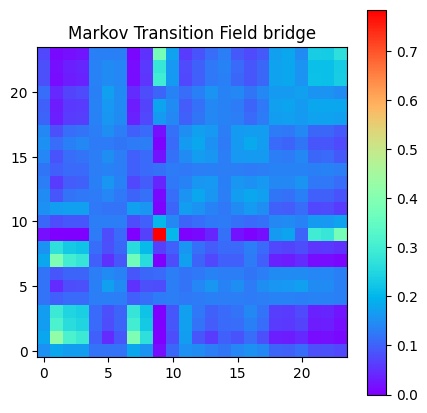

In [25]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt

# Load the BDF file
new_raw = raw

# Extract the data and sampling rate
data, sfreq = new_raw.get_data(return_times=False), new_raw.info['sfreq']
print(f"Shape of raw data: {data.shape}")

# Define the start and end times for the segment you want to extract (in seconds)
t_start = 610  # Start time in seconds
t_end = 625   # End time in seconds
# t_start = 10  # Start time in seconds
# t_end = 25   # End time in seconds
# t_start = 690  # Start time in seconds
# t_end = 705   # End time in seconds

# Convert times to sample indices
start_sample = int(t_start * sfreq)
end_sample = int(t_end * sfreq)

# Extract the segment for the first channel
subset_data = data[0, start_sample:end_sample].reshape(1, -1)
print(f"Shape of subset data: {subset_data.shape}")

# Transform the segment into MTF
image_size = 24  # Example image size
mtf = MarkovTransitionField(image_size=image_size)

# Apply MTF transformation
mtf_image = mtf.fit_transform(subset_data)[0]

# Visualize the MTF
plt.figure(figsize=(5, 5))
plt.imshow(mtf_image, cmap='rainbow', origin='lower')
plt.title(f"Markov Transition Field bridge")
plt.colorbar()
plt.show()


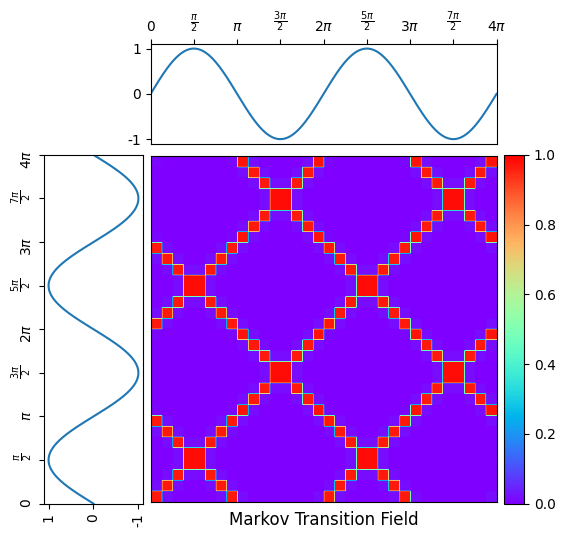

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

# Plot the time series and its Markov transition field
width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
width = 6
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()
ax_top.set_xlim((0, 4 * np.pi))
ax_top.set_yticklabels(value_ticks)

# Plot the Gramian angular fields on the bottom right
ax_mtf = fig.add_subplot(gs[1, 1])
im = ax_mtf.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.,
                   extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_mtf.set_xticks([])
ax_mtf.set_yticks([])
ax_mtf.set_title('Markov Transition Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)

plt.show()